In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Loading the data
*converts the CSV file into a Pandas dataframe.*

In [2]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("C:\\Users\\ryyao\\Desktop\\Use-case-7\\archive (21)\\final_data.csv")

### *Viewing the dataframe*


In [3]:
df['position'].replace(['Defender',
                        'Defender Centre-Back',
                       'Defender Left-Back',
                       'Defender Right-Back',
                       'Goalkeeper']
                       ,'back', inplace=True)






df['position'].replace(['midfield-CentralMidfield',
                        'idfield-DefensiveMidfield',
                        'midfield-AttackingMidfield',
                        'midfield-DefensiveMidfield' ,
                        'midfield-RightMidfield' ,
                          'midfield-LeftMidfield']
                        , 'midfield', inplace=True)


df['position'].replace(['Attack Centre-Forward',
                        'Attack-RightWinger',
                        'Attack-LeftWinger',
                        'Attack-SecondStriker',
                        'Attack',],
                        'Attack',
                         inplace=True)

In [4]:
df.rename(columns={'current_value':'current_value_K'}, inplace=True)

In [5]:
df.drop(columns=['position_encoded','winger'], inplace=True)

In [6]:
# Lists for each region
america = [
    'Club Athletico Paranaense', 'Red Bull Bragantino', 'Santos FC',
    'Clube de Regatas Vasco da Gama', 'Fluminense Football Club', 'Sport Club Internacional',
    'Esporte Clube Bahia', 'Grêmio Foot-Ball Porto Alegrense', 'Coritiba Foot Ball Club',
    'Fortaleza Esporte Clube', 'Cruzeiro Esporte Clube', 'Goiás Esporte Clube',
    'Cuiabá Esporte Clube (MT)', 'Botafogo de Futebol e Regatas', 'Clube Atlético Mineiro',
    'São Paulo Futebol Clube', 'América Futebol Clube (MG)', 'Sociedade Esportiva Palmeiras',
    'CR Flamengo', 'Sport Club Corinthians Paulista', 'Santos Laguna', 'Club León FC',
    'FC Juárez', 'Club Tijuana', 'Atlético de San Luis', 'Club Necaxa', 'Puebla FC',
    'Mazatlán FC', 'Querétaro FC', 'CF América', 'CF Monterrey', 'Atlas Guadalajara',
    'UNAM Pumas', 'Deportivo Toluca', 'Tigres UANL', 'Deportivo Guadalajara', 'CD Cruz Azul',
    'CF Pachuca', 'Philadelphia Union', 'FC Cincinnati', 'FC Dallas', 'Orlando City SC',
    'Los Angeles Galaxy', 'New England Revolution', 'D.C. United', 'New York Red Bulls',
    'Portland Timbers', 'Columbus Crew', 'Charlotte FC', 'Sporting Kansas City',
    'Colorado Rapids', 'Vancouver Whitecaps FC', 'Chicago Fire FC', 'Inter Miami CF',
    'Minnesota United FC', 'Houston Dynamo FC', 'St. Louis CITY SC', 'CF Montréal',
    'Real Salt Lake City', 'Nashville SC', 'San Jose Earthquakes', 'Seattle Sounders FC',
    'Atlanta United FC', 'New York City FC', 'Austin FC', 'Los Angeles FC', 'Toronto FC',
    'CA Vélez Sarsfield', 'CA San Lorenzo de Almagro', 'Club Atlético Lanús', 'Defensa y Justicia',
    'Club Estudiantes de La Plata', "CA Newell's Old Boys", 'CA Colon', 'CA Rosario Central',
    'CA Banfield', 'Club de Gimnasia y Esgrima La Plata', 'Club Atlético Tucumán',
    'CD Godoy Cruz Antonio Tomba', 'Club Atlético Unión', 'Club Atlético Platense',
    'Instituto AC Córdoba', 'CA Sarmiento (Junin)', 'CA Central Córdoba (SdE)',
    'CA Barracas Central', 'Arsenal Fútbol Club', 'Club Atlético Talleres', 'Club Atlético Belgrano',
    'AA Argentinos Juniors', 'CA Independiente', 'Club Atlético Tigre', 'CA River Plate',
    'CA Boca Juniors', 'CA Huracán', 'Racing Club'
]

asia1 = [
    'Kawasaki Frontale', 'Yokohama F. Marinos', 'Cerezo Osaka', 'Kyoto Sanga', 'FC Tokyo',
    'Nagoya Grampus', 'Kashiwa Reysol', 'Yokohama FC', 'Avispa Fukuoka', 'Sagan Tosu',
    'Vissel Kobe', 'Hokkaido Consadole Sapporo', 'Shonan Bellmare', 'Albirex Niigata',
    'Kashima Antlers', 'Sanfrecce Hiroshima', 'Urawa Red Diamonds', 'Gamba Osaka',
    'Al-Shabab Club (Riyadh)', 'Ettifaq FC', 'Al-Taawoun FC', 'Al-Wehda FC', 'Damac FC',
    'Al-Tai', 'Al-Fayha FC', 'Abha Club', 'Al-Khaleej', 'Al-Raed SFC', 'Al-Batin FC',
    'Al-Adalah FC', 'Al-Ittihad Club (Jeddah)', 'Al-Fateh SC', 'Al-Hilal Saudi FC', 'Al-Nassr FC',
    'Suwon Samsung Bluewings', 'Jeju United', 'Incheon United', 'Gangwon FC', 'Daejeon Hana Citizen',
    'Gwangju FC', 'Daegu FC', 'Suwon FC', 'Pohang Steelers', 'FC Seoul', 'Jeonbuk Hyundai Motors',
    'Ulsan Hyundai', 'Melbourne Victory', 'Western United FC', 'Newcastle United Jets',
    'Perth Glory', 'Macarthur FC', 'Brisbane Roar', 'Central Coast Mariners', 'Wellington Phoenix',
    'Melbourne City FC', 'Sydney FC', 'Adelaide United', 'Western Sydney Wanderers'
]

africa = [
    'Sekhukhune United FC', 'AmaZulu FC', 'Lamontville Golden Arrows', 'Stellenbosch FC',
    'Swallows FC', 'Maritzburg United FC', 'Royal AM FC', 'TS Galaxy FC', 'Richards Bay FC',
    'Marumo Gallants FC', 'Cape Town City FC', 'Orlando Pirates', 'SuperSport United',
    'Chippa United', 'Mamelodi Sundowns FC', 'Kaizer Chiefs'
]

europe = [
    'Manchester United', 'West Ham United', 'Leicester City', 'Aston Villa', 'Wolverhampton Wanderers',
    'Southampton FC', 'Brighton & Hove Albion', 'Everton FC', 'Nottingham Forest', 'Leeds United',
    'Crystal Palace', 'Fulham FC', 'AFC Bournemouth', 'Brentford FC', 'Liverpool FC',
    'Newcastle United', 'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
    'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim', '1.FC Union Berlin',
    'FC Augsburg', 'VfB Stuttgart', '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
    'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt', 'SC Freiburg', 'Borussia Dortmund',
    'Bayer 04 Leverkusen', 'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
    'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF', 'Sevilla FC', 'Celta de Vigo',
    'CA Osasuna', 'Girona FC', 'Rayo Vallecano', 'RCD Mallorca', 'UD Almería', 'Real Valladolid CF',
    'Cádiz CF', 'Elche CF', 'RCD Espanyol Barcelona', 'Getafe CF', 'Atlético de Madrid', 'Real Madrid',
    'FC Barcelona', 'AS Roma', 'SS Lazio', 'ACF Fiorentina', 'US Sassuolo', 'Torino FC', 'Udinese Calcio',
    'Bologna FC 1909', 'AC Monza', 'FC Empoli', 'US Lecce', 'Spezia Calcio', 'Hellas Verona', 'UC Sampdoria',
    'US Cremonese', 'US Salernitana 1919', 'Atalanta BC', 'SSC Napoli', 'Inter Milan', 'AC Milan',
    'Juventus FC', 'AS Monaco', 'Stade Rennais FC', 'Olympique Marseille', 'OGC Nice', 'RC Lens',
    'FC Nantes', 'Montpellier HSC', 'FC Lorient', 'FC Toulouse', 'ESTAC Troyes', 'Stade Brestois 29',
    'Angers SCO', 'AJ Auxerre', 'Clermont Foot 63', 'AC Ajaccio', 'Olympique Lyon', 'LOSC Lille',
    'Stade Reims', 'RC Strasbourg Alsace', 'Paris Saint-Germain', 'AZ Alkmaar', 'Twente Enschede FC',
    'Vitesse Arnhem', 'FC Groningen', 'Fortuna Sittard', 'NEC Nijmegen', 'Sparta Rotterdam',
    'SC Cambuur Leeuwarden', 'Excelsior Rotterdam', 'FC Volendam', 'RKC Waalwijk', 'FC Emmen',
    'Go Ahead Eagles', 'FC Utrecht', 'SC Heerenveen', 'Ajax Amsterdam', 'PSV Eindhoven',
    'Feyenoord Rotterdam', 'SC Braga', 'FC Famalicão', 'Vitória Guimarães SC', 'CD Santa Clara',
    'GD Estoril Praia', 'Boavista FC', 'Portimonense SC', 'CS Marítimo', 'Casa Pia AC', 'FC Paços de Ferreira',
    'FC Arouca', 'FC Vizela', 'Rio Ave FC', 'GD Chaves', 'Gil Vicente FC', 'FC Porto', 'Sporting CP',
    'SL Benfica', 'Dynamo Moscow', 'Lokomotiv Moscow', 'FK Rostov', 'Krylya Sovetov Samara', 'FC Sochi',
    'Akhmat Grozny', 'Ural Yekaterinburg', 'FK Orenburg', 'FC Pari Nizhniy Novgorod', 'FK Khimki',
    'Torpedo Moscow', 'Fakel Voronezh', 'Spartak Moscow', 'CSKA Moscow', 'FK Krasnodar', 'Zenit St. Petersburg',
    'West Bromwich Albion', 'Sunderland AFC', 'Hull City', 'Preston North End', 'Stoke City', 'Queens Park Rangers',
    'Birmingham City', 'Cardiff City', 'Millwall FC', 'Reading FC', 'Blackpool FC', 'Bristol City',
    'Huddersfield Town', 'Rotherham United', 'Wigan Athletic', 'Middlesbrough FC', 'Coventry City', 'Luton Town',
    'Swansea City', 'Burnley FC', 'Watford FC', 'Sheffield United', 'Blackburn Rovers', 'Norwich City', 'Trabzonspor',
    'Besiktas JK', 'Basaksehir FK', 'Antalyaspor', 'Adana Demirspor', 'Alanyaspor', 'Kasimpasa', 'Konyaspor',
    'MKE Ankaragücü', 'Sivasspor', 'Kayserispor', 'Giresunspor', 'Istanbulspor', 'Hatayspor', 'Gaziantep FK',
    'Fatih Karagümrük', 'Ümraniyespor', 'Fenerbahce', 'Galatasaray', 'SK Sturm Graz', 'LASK', 'SCR Altach',
    'SC Austria Lustenau', 'SV Ried', 'TSV Hartberg', 'WSG Tirol', 'Rapid Vienna', 'Austria Vienna',
    'SK Austria Klagenfurt', 'Wolfsberger AC', 'Red Bull Salzburg'
]


In [7]:
afr = df[df['team'].isin(africa)]
amr=df[df['team'].isin(america)]
asi=df[df['team'].isin(asia1)]
eur=df[df['team'].isin(europe)]

In [8]:

team_region_mapping = {
    'Manchester United': 'Europe',
    'West Ham United': 'Europe',
    'Leicester City': 'Europe',
    'Aston Villa': 'Europe',
    'Wolverhampton Wanderers': 'Europe',
    'Southampton FC': 'Europe',
    'Brighton & Hove Albion': 'Europe',
    'Everton FC': 'Europe',
    'Nottingham Forest': 'Europe',
    'Leeds United': 'Europe',
    'Crystal Palace': 'Europe',
    'Fulham FC': 'Europe',
    'AFC Bournemouth': 'Europe',
    'Brentford FC': 'Europe',
    'Liverpool FC': 'Europe',
    'Newcastle United': 'Europe',
    'Manchester City': 'Europe',
    'Arsenal FC': 'Europe',
    'Tottenham Hotspur': 'Europe',
    'Chelsea FC': 'Europe',
    'Borussia Mönchengladbach': 'Europe',
    'VfL Wolfsburg': 'Europe',
    'TSG 1899 Hoffenheim': 'Europe',
    '1.FC Union Berlin': 'Europe',
    'FC Augsburg': 'Europe',
    'VfB Stuttgart': 'Europe',
    '1.FSV Mainz 05': 'Europe',
    '1.FC Köln': 'Europe',
    'Hertha BSC': 'Europe',
    'FC Schalke 04': 'Europe',
    'VfL Bochum': 'Europe',
    'SV Werder Bremen': 'Europe',
    'Eintracht Frankfurt': 'Europe',
    'SC Freiburg': 'Europe',
    'Borussia Dortmund': 'Europe',
    'Bayer 04 Leverkusen': 'Europe',
    'Bayern Munich': 'Europe',
    'RB Leipzig': 'Europe',
    'Real Sociedad': 'Europe',
    'Villarreal CF': 'Europe',
    'Real Betis Balompié': 'Europe',
    'Athletic Bilbao': 'Europe',
    'Valencia CF': 'Europe',
    'Sevilla FC': 'Europe',
    'Celta de Vigo': 'Europe',
    'CA Osasuna': 'Europe',
    'Girona FC': 'Europe',
    'Rayo Vallecano': 'Europe',
    'RCD Mallorca': 'Europe',
    'UD Almería': 'Europe',
    'Real Valladolid CF': 'Europe',
    'Cádiz CF': 'Europe',
    'Elche CF': 'Europe',
    'RCD Espanyol Barcelona': 'Europe',
    'Getafe CF': 'Europe',
    'Atlético de Madrid': 'Europe',
    'Real Madrid': 'Europe',
    'FC Barcelona': 'Europe',
    'AS Roma': 'Europe',
    'SS Lazio': 'Europe',
    'ACF Fiorentina': 'Europe',
    'US Sassuolo': 'Europe',
    'Torino FC': 'Europe',
    'Udinese Calcio': 'Europe',
    'Bologna FC 1909': 'Europe',
    'AC Monza': 'Europe',
    'FC Empoli': 'Europe',
    'US Lecce': 'Europe',
    'Spezia Calcio': 'Europe',
    'Hellas Verona': 'Europe',
    'UC Sampdoria': 'Europe',
    'US Cremonese': 'Europe',
    'US Salernitana 1919': 'Europe',
    'Atalanta BC': 'Europe',
    'SSC Napoli': 'Europe',
    'Inter Milan': 'Europe',
    'AC Milan': 'Europe',
    'Juventus FC': 'Europe',
    'AS Monaco': 'Europe',
    'Stade Rennais FC': 'Europe',
    'Olympique Marseille': 'Europe',
    'OGC Nice': 'Europe',
    'RC Lens': 'Europe',
    'FC Nantes': 'Europe',
    'Montpellier HSC': 'Europe',
    'FC Lorient': 'Europe',
    'FC Toulouse': 'Europe',
    'ESTAC Troyes': 'Europe',
    'Stade Brestois 29': 'Europe',
    'Angers SCO': 'Europe',
    'AJ Auxerre': 'Europe',
    'Clermont Foot 63': 'Europe',
    'AC Ajaccio': 'Europe',
    'Olympique Lyon': 'Europe',
    'LOSC Lille': 'Europe',
    'Stade Reims': 'Europe',
    'RC Strasbourg Alsace': 'Europe',
    'Paris Saint-Germain': 'Europe',
    'AZ Alkmaar': 'Europe',
    'Twente Enschede FC': 'Europe',
    'Vitesse Arnhem': 'Europe',
    'FC Groningen': 'Europe',
    'Fortuna Sittard': 'Europe',
    'NEC Nijmegen': 'Europe',
    'Sparta Rotterdam': 'Europe',
    'SC Cambuur Leeuwarden': 'Europe',
    'Excelsior Rotterdam': 'Europe',
    'FC Volendam': 'Europe',
    'RKC Waalwijk': 'Europe',
    'FC Emmen': 'Europe',
    'Go Ahead Eagles': 'Europe',
    'FC Utrecht': 'Europe',
    'SC Heerenveen': 'Europe',
    'Ajax Amsterdam': 'Europe',
    'PSV Eindhoven': 'Europe',
    'Feyenoord Rotterdam': 'Europe',
    'Dynamo Moscow': 'Europe',
    'Lokomotiv Moscow': 'Europe',
    'FK Rostov': 'Europe',
    'Krylya Sovetov Samara': 'Europe',
    'FC Sochi': 'Europe',
    'Akhmat Grozny': 'Europe',
    'Ural Yekaterinburg': 'Europe',
    'FK Orenburg': 'Europe',
    'FC Pari Nizhniy Novgorod': 'Europe',
    'FK Khimki': 'Europe',
    'Torpedo Moscow': 'Europe',
    'Fakel Voronezh': 'Europe',
    'Spartak Moscow': 'Europe',
    'CSKA Moscow': 'Europe',
    'FK Krasnodar': 'Europe',
    'Zenit St. Petersburg': 'Europe',
    'West Bromwich Albion': 'Europe',
    'Sunderland AFC': 'Europe',
    'Hull City': 'Europe',
    'Preston North End': 'Europe',
    'Stoke City': 'Europe',
    'Queens Park Rangers': 'Europe',
    'Birmingham City': 'Europe',
    'Cardiff City': 'Europe',
    'Millwall FC': 'Europe',
    'Reading FC': 'Europe',
    'Blackpool FC': 'Europe',
    'Bristol City': 'Europe',
    'Huddersfield Town': 'Europe',
    'Rotherham United': 'Europe',
    'Wigan Athletic': 'Europe',
    'Middlesbrough FC': 'Europe',
    'Coventry City': 'Europe',
    'Luton Town': 'Europe',
    'Swansea City': 'Europe',
    'Burnley FC': 'Europe',
    'Watford FC': 'Europe',
    'Sheffield United': 'Europe',
    'Blackburn Rovers': 'Europe',
    'Norwich City': 'Europe',
    'Trabzonspor': 'Europe',
    'Besiktas JK': 'Europe',
    'Basaksehir FK': 'Europe',
    'Antalyaspor': 'Europe',
    'Adana Demirspor': 'Europe',
    'Alanyaspor': 'Europe',
    'Kasimpasa': 'Europe',
    'Konyaspor': 'Europe',
    'MKE Ankaragücü': 'Europe',
    'Sivasspor': 'Europe',
    'Kayserispor': 'Europe',
    'Giresunspor': 'Europe',
    'Istanbulspor': 'Europe',
    'Hatayspor': 'Europe',
    'Gaziantep FK': 'Europe',
    'Fatih Karagümrük': 'Europe',
    'Ümraniyespor': 'Europe',
    'Fenerbahce': 'Europe',
    'Galatasaray': 'Europe',
    'SK Sturm Graz': 'Europe',
    'LASK': 'Europe',
    'SCR Altach': 'Europe',
    'SC Austria Lustenau': 'Europe',
    'SV Ried': 'Europe',
    'TSV Hartberg': 'Europe',
    'WSG Tirol': 'Europe',
    'Rapid Vienna': 'Europe',
    'Austria Vienna': 'Europe',
    'SK Austria Klagenfurt': 'Europe',
    'Wolfsberger AC': 'Europe',
    'Red Bull Salzburg': 'Europe',
    'Philadelphia Union': 'America',
    'FC Cincinnati': 'America',
    'FC Dallas': 'America',
    'Orlando City SC': 'America',
    'Los Angeles Galaxy': 'America',
    'New England Revolution': 'America',
    'D.C. United': 'America',
    'New York Red Bulls': 'America',
    'Portland Timbers': 'America',
    'Columbus Crew': 'America',
    'Charlotte FC': 'America',
    'Sporting Kansas City': 'America',
    'Colorado Rapids': 'America',
    'Vancouver Whitecaps FC': 'America',
    'Chicago Fire FC': 'America',
    'Inter Miami CF': 'America',
    'Minnesota United FC': 'America',
    'Houston Dynamo FC': 'America',
    'St. Louis CITY SC': 'America',
    'CF Montréal': 'America',
    'Real Salt Lake City': 'America',
    'Nashville SC': 'America',
    'San Jose Earthquakes': 'America',
    'Seattle Sounders FC': 'America',
    'Atlanta United FC': 'America',
    'New York City FC': 'America',
    'Austin FC': 'America',
    'Los Angeles FC': 'America',
    'Toronto FC': 'America',
    'CA Vélez Sarsfield': 'America',
    'CA San Lorenzo de Almagro': 'America',
    'Club Atlético Lanús': 'America',
    'Defensa y Justicia': 'America',
    'Club Estudiantes de La Plata': 'America',
    "CA Newell's Old Boys": 'America',
    'CA Colon': 'America',
    'CA Rosario Central': 'America',
    'CA Banfield': 'America',
    'Club de Gimnasia y Esgrima La Plata': 'America',
    'Club Atlético Tucumán': 'America',
    'CD Godoy Cruz Antonio Tomba': 'America',
    'Club Atlético Unión': 'America',
    'Club Atlético Platense': 'America',
    'Instituto AC Córdoba': 'America',
    'CA Sarmiento (Junin)': 'America',
    'CA Central Córdoba (SdE)': 'America',
    'CA Barracas Central': 'America',
    'Arsenal Fútbol Club': 'America',
    'Club Atlético Talleres': 'America',
    'Club Atlético Belgrano': 'America',
    'AA Argentinos Juniors': 'America',
    'CA Independiente': 'America',
    'Club Atlético Tigre': 'America',
    'CA River Plate': 'America',
    'CA Boca Juniors': 'America',
    'CA Huracán': 'America',
    'Racing Club': 'America',
    'Club Athletico Paranaense': 'America',
    'Red Bull Bragantino': 'America',
    'Santos FC': 'America',
    'Clube de Regatas Vasco da Gama': 'America',
    'Fluminense Football Club': 'America',
    'Sport Club Internacional': 'America',
    'Esporte Clube Bahia': 'America',
    'Grêmio Foot-Ball Porto Alegrense': 'America',
    'Coritiba Foot Ball Club': 'America',
    'Fortaleza Esporte Clube': 'America',
    'Cruzeiro Esporte Clube': 'America',
    'Goiás Esporte Clube': 'America',
    'Cuiabá Esporte Clube (MT)': 'America',
    'Botafogo de Futebol e Regatas': 'America',
    'Clube Atlético Mineiro': 'America',
    'São Paulo Futebol Clube': 'America',
    'América Futebol Clube (MG)': 'America',
    'Sociedade Esportiva Palmeiras': 'America',
    'CR Flamengo': 'America',
    'Sport Club Corinthians Paulista': 'America',
    'Santos Laguna': 'America',
    'Club León FC': 'America',
    'FC Juárez': 'America',
    'Club Tijuana': 'America',
    'Atlético de San Luis': 'America',
    'Club Necaxa': 'America',
    'Puebla FC': 'America',
    'Mazatlán FC': 'America',
    'Querétaro FC': 'America',
    'CF América': 'America',
    'CF Monterrey': 'America',
    'Atlas Guadalajara': 'America',
    'UNAM Pumas': 'America',
    'Deportivo Toluca': 'America',
    'Tigres UANL': 'America',
    'Deportivo Guadalajara': 'America',
    'CD Cruz Azul': 'America',
    'CF Pachuca': 'America',
    'Kawasaki Frontale': 'Asia',
    'Yokohama F. Marinos': 'Asia',
    'Cerezo Osaka': 'Asia',
    'Kyoto Sanga': 'Asia',
    'FC Tokyo': 'Asia',
    'Nagoya Grampus': 'Asia',
    'Kashiwa Reysol': 'Asia',
    'Yokohama FC': 'Asia',
    'Avispa Fukuoka': 'Asia',
    'Sagan Tosu': 'Asia',
    'Vissel Kobe': 'Asia',
    'Hokkaido Consadole Sapporo': 'Asia',
    'Shonan Bellmare': 'Asia',
    'Albirex Niigata': 'Asia',
    'Kashima Antlers': 'Asia',
    'Sanfrecce Hiroshima': 'Asia',
    'Urawa Red Diamonds': 'Asia',
    'Gamba Osaka': 'Asia',
    'Al-Shabab Club (Riyadh)': 'Asia',
    'Ettifaq FC': 'Asia',
    'Al-Taawoun FC': 'Asia',
    'Al-Wehda FC': 'Asia',
    'Damac FC': 'Asia',
    'Al-Tai': 'Asia',
    'Al-Fayha FC': 'Asia',
    'Abha Club': 'Asia',
    'Al-Khaleej': 'Asia',
    'Al-Raed SFC': 'Asia',
    'Al-Batin FC': 'Asia',
    'Al-Adalah FC': 'Asia',
    'Al-Ittihad Club (Jeddah)': 'Asia',
    'Al-Fateh SC': 'Asia',
    'Al-Hilal Saudi FC': 'Asia',
    'Al-Nassr FC': 'Asia',
    'Suwon Samsung Bluewings': 'Asia',
    'Jeju United': 'Asia',
    'Incheon United': 'Asia',
    'Gangwon FC': 'Asia',
    'Daejeon Hana Citizen': 'Asia',
    'Gwangju FC': 'Asia',
    'Daegu FC': 'Asia',
    'Suwon FC': 'Asia',
    'Pohang Steelers': 'Asia',
    'FC Seoul': 'Asia',
    'Jeonbuk Hyundai Motors': 'Asia',
    'Ulsan Hyundai': 'Asia',
    'Sekhukhune United FC': 'Africa',
    'AmaZulu FC': 'Africa',
    'Lamontville Golden Arrows': 'Africa',
    'Stellenbosch FC': 'Africa',
    'Swallows FC': 'Africa',
    'Maritzburg United FC': 'Africa',
    'Royal AM FC': 'Africa',
    'TS Galaxy FC': 'Africa',
    'Richards Bay FC': 'Africa',
    'Marumo Gallants FC': 'Africa',
    'Cape Town City FC': 'Africa',
    'Orlando Pirates': 'Africa',
    'SuperSport United': 'Africa',
    'Chippa United': 'Africa',
    'Mamelodi Sundowns FC': 'Africa',
    'Kaizer Chiefs': 'Africa',
    'Melbourne Victory': 'Asia',
    'Western United FC': 'Asia',
    'Newcastle United Jets': 'Asia',
    'Perth Glory': 'Asia',
    'Macarthur FC': 'Asia',
    'Brisbane Roar': 'Asia',
    'Central Coast Mariners': 'Asia',
    'Wellington Phoenix': 'Asia',
    'Melbourne City FC': 'Asia',
    'Sydney FC': 'Asia',
    'Adelaide United': 'Asia',
    'Western Sydney Wanderers': 'Asia',
}


df['region']=df['team'].map(team_region_mapping)




In [9]:
afr=afr[afr['current_value_K']<=1200000]
asia=asi[asi['current_value_K']<=4000000]
amr=amr[amr['current_value_K']<=8000000]
eur=eur[eur['current_value_K']<=10000000]


In [10]:
afr.shape
afr_p35 = afr['current_value_K'].quantile(0.35)
afr_p75 = afr['current_value_K'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < afr_p35:
        return 'Cheap_Price'
    elif price < afr_p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
afr['player_price_category'] = afr['current_value_K'].apply(categorize_price)

# afr.drop('Price', axis=1, inplace=True)

# Verify the distribution of the new categories
print(afr['player_price_category'].value_counts())

player_price_category
Good_Price     227
Cheap_Price    166
High_Price     133
Name: count, dtype: int64


In [11]:
asia_p35 = asi['current_value_K'].quantile(0.35)
asia_p75 = asi['current_value_K'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < asia_p35:
        return 'Cheap_Price'
    elif price < asia_p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
asi['player_price_category'] = asi['current_value_K'].apply(categorize_price)

# afr.drop('Price', axis=1, inplace=True)

# Verify the distribution of the new categories
print(asi['player_price_category'].value_counts())

player_price_category
Good_Price     694
Cheap_Price    670
High_Price     562
Name: count, dtype: int64


In [12]:
america_p35 = amr['current_value_K'].quantile(0.35)
america_p75 = amr['current_value_K'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < america_p35:
        return 'Cheap_Price'
    elif price < america_p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
amr['player_price_category'] = amr['current_value_K'].apply(categorize_price)

# afr.drop('Price', axis=1, inplace=True)

# Verify the distribution of the new categories
print(amr['player_price_category'].value_counts())

player_price_category
Good_Price     1060
Cheap_Price     939
High_Price      696
Name: count, dtype: int64


In [13]:
europe_p35 = eur['current_value_K'].quantile(0.35)
europe_p75 = eur['current_value_K'].quantile(0.75)

# Function to categorize prices
def categorize_price(price):
    if price < europe_p35:
        return 'Cheap_Price'
    elif price < europe_p75:
        return 'Good_Price'
    else:
        return 'High_Price'

# Apply the function to create a new column
eur['player_price_category'] = eur['current_value_K'].apply(categorize_price)

# afr.drop('Price', axis=1, inplace=True)

# Verify the distribution of the new categories
print(eur['player_price_category'].value_counts())

player_price_category
Good_Price     1710
Cheap_Price    1630
High_Price     1350
Name: count, dtype: int64


# now lets prepare the data sets


In [14]:
eur['position'].unique()

array(['back', 'midfield', 'Attack'], dtype=object)

In [15]:
eur=pd.get_dummies(eur, columns=['position'])

In [16]:
## encoded the target
encoder = LabelEncoder()
eur['player_price_category_encoded'] = encoder.fit_transform(eur['player_price_category'])  

In [17]:
eur.head(2)

,player,team,name,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,days_injured,games_injured,award,current_value_K,highest_value,player_price_category,position_Attack,position_back,position_midfield,player_price_category_encoded
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,196.0,30.0,15,0.0,0.0,0.069018,0.0,...,510,58,1,1500000,22000000,Good_Price,False,True,False,1
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,188.0,37.0,4,0.0,0.0,0.000000,0.0,...,697,84,4,600000,6000000,Cheap_Price,False,True,False,0


In [18]:
eur.columns

Index(['player', 'team', 'name', 'height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value_K', 'highest_value',
       'player_price_category', 'position_Attack', 'position_back',
       'position_midfield', 'player_price_category_encoded'],
      dtype='object')

# *BUILD MODEL*

In [19]:

X=eur[['height','age','appearance',
         'goals', 'assists',
         'minutes played', 'days_injured',
         'award',  'highest_value',
         'position_Attack'
         
         ]]

# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X.shape

(4690, 10)

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

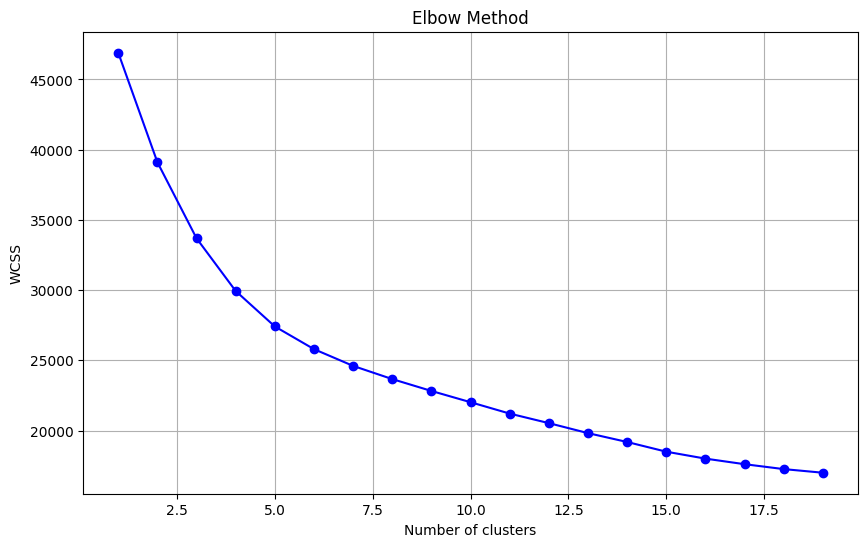

In [22]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [23]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 5 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)


In [24]:
y_pred = model.fit_predict(X_scaled)

In [25]:
X['kmeans'] = y_pred

In [26]:
X['kmeans'].value_counts()

kmeans
1    1454
3    1355
2    1081
0     664
4     136
Name: count, dtype: int64

In [27]:
X[X['kmeans']==0]

,height,age,appearance,goals,assists,minutes played,days_injured,award,highest_value,position_Attack,kmeans
1,196.0,30.0,15,0.000000,0.000000,1304,510,1,22000000,False,0
2,188.0,37.0,4,0.000000,0.000000,292,697,4,6000000,False,0
7,185.0,31.0,8,0.000000,0.000000,416,932,7,20000000,False,0
33,190.0,38.0,75,0.000000,0.000000,6623,554,4,9000000,False,0
37,191.0,35.0,42,0.027060,0.000000,3326,664,5,13000000,False,0
...,...,...,...,...,...,...,...,...,...,...,...
6634,185.0,27.0,32,0.038363,0.115090,2346,847,0,600000,False,0
6636,183.0,32.0,44,0.034351,0.206107,2620,505,3,800000,False,0
6652,189.0,39.0,2,0.000000,0.000000,123,361,19,1500000,False,0
6655,187.0,25.0,18,0.129964,0.064982,1385,248,10,5000000,False,0


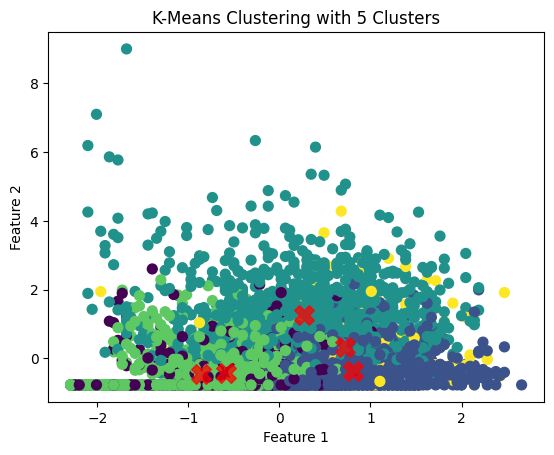

In [28]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

<Axes: xlabel='age', ylabel='goals'>

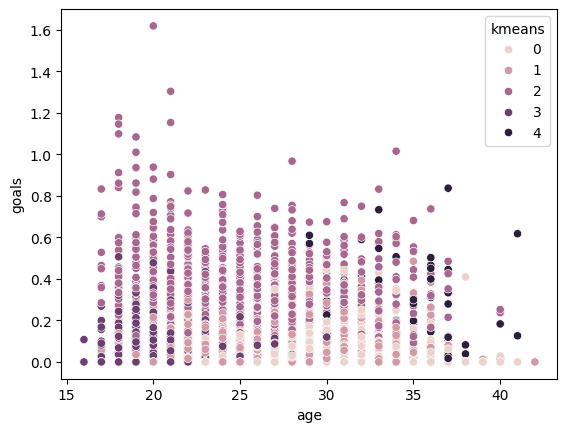

In [29]:
sns.scatterplot(data = X , x = 'age', y = 'goals', hue = 'kmeans')

In [30]:
import os
import joblib

# التأكد من وجود الدليل "Models"، وإذا لم يكن موجودًا، سيتم إنشاؤه
os.makedirs('Models', exist_ok=True)

# حفظ النموذج والمقياس
joblib.dump(model, 'ML-Kmeans.joblib')
joblib.dump(scaler, 'Models/scaler.joblib')

['Models/scaler.joblib']

# *lets stop here and let the rest for future works...*
# *Thanks*